In [165]:
import numpy as np
import random
from math import *

In [166]:
NUMBER_OF_NODE = 10;
NUMBER_OF_VOTE = "vote"
POINT = "point"
NUMBER_OF_VALIDATOR = "validator"
NUMBER_OF_DEPOSIT = "deposit"
NODE = "node"
SPEED = "speed"
RANKING = "ranking"
NUMBER_OF_EPOCH = "epoch"

#init nodes
def init_nodes(number_of_node):
    nodes = []
    for i in range(number_of_node):
        nodes.append({})
        nodes[i][NODE] = i+1
        nodes[i][SPEED] = 0
        nodes[i][RANKING] = 0
        nodes[i][NUMBER_OF_DEPOSIT] = 0
        nodes[i][NUMBER_OF_VOTE] = 0
        nodes[i][NUMBER_OF_VALIDATOR] = 0
        nodes[i][NUMBER_OF_EPOCH] = 0
        nodes[i][POINT] = 0
    
    return nodes

In [167]:
#random speed of nodes
def random_nodes_speed(nodes):
    arr_speed = np.random.randint(low=5,high=10,size=len(nodes)).tolist()
    for i in range(len(arr_speed)):
        nodes[i][SPEED] = arr_speed[i]
    return arr_speed

In [168]:
#random number of epochs that masternode join in blockchain
def random_epochs_of_nodes(nodes):
    arr_epochs = np.random.randint(low=1,high=9000,size=len(nodes)).tolist()
    for i in range(len(arr_speed)):
        nodes[i][NUMBER_OF_EPOCH] = arr_speed[i]
    return arr_epochs

In [182]:
def deposit_votes(nodes):
    arr_deposit_vote = np.random.randint(low=50000,high=500000,size=len(nodes)).tolist()
    arr_deposit_vote = np.sort(arr_deposit_vote)[::-1]
    for i in range(len(arr_deposit_vote)):
        nodes[i][NUMBER_OF_DEPOSIT] = arr_deposit_vote[i]
    return arr_deposit_vote

In [170]:
# chose a leader node by voting
def vote_leader(nodes):
    
    #random array with length is number of canidate of leader
    arr_random = np.random.rand(len(nodes)).tolist()
    
    #select lead node
    index_of_leader = -1
    maximum = -1
    arr_leader = []
    for i in range(len(nodes)):
        multi = nodes[i][NUMBER_OF_DEPOSIT] * arr_random[i]
        arr_leader.append(multi)
        if multi > maximum:
            index_of_leader = i
            maximum = arr_leader[i]
    nodes[index_of_leader][NUMBER_OF_VOTE] += 1
    return index_of_leader


In [198]:
# Ranking for each masternode
def ranking(nodes, arr_deposit_vote, arr_speed):
    total_deposit = sum(arr_deposit_vote)

    total_vote = 2000  # Total voting in one epoch
    total_epoch = 9000  # Total epoch in blockchain
    speed_arg = sum(arr_speed)/len(nodes)
    a = 0.6
    b,c,d,e = 0.25, 0.1, 0, 0.35
    for i in range(len(arr_deposit_vote)):
        trust = b*nodes[i][NUMBER_OF_EPOCH]/total_epoch + c*(
                nodes[i][SPEED]/speed_arg) + d*(
                nodes[i][NUMBER_OF_VOTE]/total_vote) + e*(
                nodes[i][NUMBER_OF_VOTE]/nodes[i][NUMBER_OF_EPOCH]) + (1-b-c-d-e)*(
                nodes[i][NUMBER_OF_VALIDATOR]/nodes[i][NUMBER_OF_EPOCH])
        
        vote_arg_deposit = arr_deposit_vote[i]/total_deposit
        
        nodes[i][RANKING] = a*(vote_arg_deposit) + (1-a)*trust
        

In [199]:
# Random validator base on Ranking of each node
def random_validator(nodes, arr_deposit_vote, leader):
    point_arr = []
    index_of_validator = -1
    maximum = -1
    
    total = sum(arr_deposit_vote) - arr_deposit_vote[leader]
    mean = total/(len(nodes) - 1)
    
    arr_random = np.random.rand(len(nodes)-1).tolist()
    for i in range(len(arr_random)):
        nodes[i][POINT] = nodes[i][RANKING] * arr_random[i] * 1/mean
        if nodes[i][POINT] > maximum:
            maximum = nodes[i][POINT]
            if i != leader:
                index_of_validator = i
    nodes[index_of_validator][NUMBER_OF_VALIDATOR] += 1
    return index_of_validator

In [237]:
nodes = init_nodes(150)
arr_deposit_vote = deposit_votes(nodes)
arr_speed = random_nodes_speed(nodes)
arr_epochs = random_epochs_of_nodes(nodes)
random_ranking(nodes, arr_deposit_vote, arr_speed)
# leader = random_lead(nodes)
for i in range(2000):
    leader = random_lead(nodes)
    validator = random_validator(nodes, arr_deposit_vote, leader)

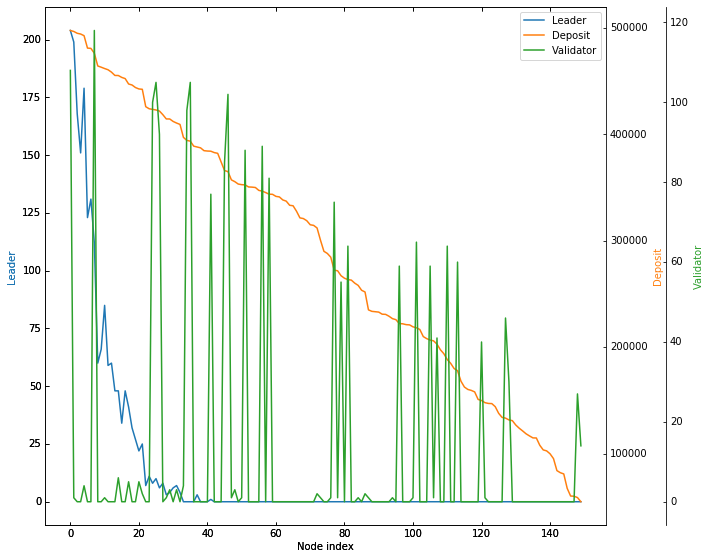

In [238]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.set_xlabel("Node index")
host.set_ylabel("Leader")

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Deposit")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("Validator")
new_axisline = par2.get_grid_helper().new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)

x_array = []
leader_y_array = []
deposit_y_array = []
validator_y_array = []
for i in range(len(nodes)):
    x_array.append(i)
    leader_y_array.append(nodes[i][NUMBER_OF_VOTE])
    deposit_y_array.append(nodes[i][NUMBER_OF_DEPOSIT])
    validator_y_array.append(nodes[i][NUMBER_OF_VALIDATOR])

host.set_xlabel("Node index")
host.set_ylabel("Leader")
par1.set_ylabel("Deposit")

p1, = host.plot(x_array, leader_y_array, label="Leader")
p2, = par1.plot(x_array, deposit_y_array, label="Deposit")
p3, = par2.plot(x_array, validator_y_array, label="Validator")

# par1.set_ylim(0, 4)
# par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

plt.show()

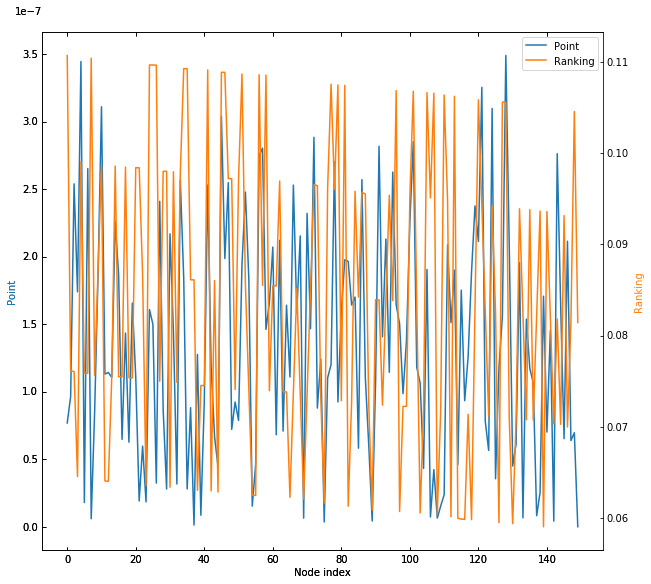

In [239]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)

host.set_xlabel("Node index")
host.set_ylabel("Leader")

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Deposit")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

fig.add_axes(host)

x_array = []
point_y_array = []
ranking_y_array = []
for i in range(len(nodes)):
    x_array.append(i)
    point_y_array.append(nodes[i][POINT])
    ranking_y_array.append(nodes[i][RANKING])


host.set_xlabel("Node index")
host.set_ylabel("Point")
par1.set_ylabel("Ranking")

p1, = host.plot(x_array, point_y_array, label="Point")
p2, = par1.plot(x_array, ranking_y_array, label="Ranking")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.show()